# **Análisis Exploratorio de Datos (EDA) - E-commerce Británico**
Este análisis explora un conjunto de datos de ventas de un e-commerce británico. Incluye análisis descriptivos, visualización de datos y patrones de comportamiento por país y tiempo.

### Carga del Librerias

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


# Carga del Dataset

In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",", encoding='latin-1') # Changed encoding to 'latin-1'
df.head(10)

Saving data.csv to data.csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## 1. Exploración inicial y tipos de datos

### 1.1 Información general del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 1.2 Clasificación de variables

In [5]:
# Variables categóricas y numéricas
cat_vars = df.select_dtypes(include='object').columns.tolist()
num_vars = df.select_dtypes(include=np.number).columns.tolist()
print(f'Variables categóricas: {cat_vars}')
print(f'Variables numéricas: {num_vars}')

Variables categóricas: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
Variables numéricas: ['Quantity', 'UnitPrice', 'CustomerID']


### 1.3 Preprocesamiento básico de datos

In [6]:
# Valores nulos
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


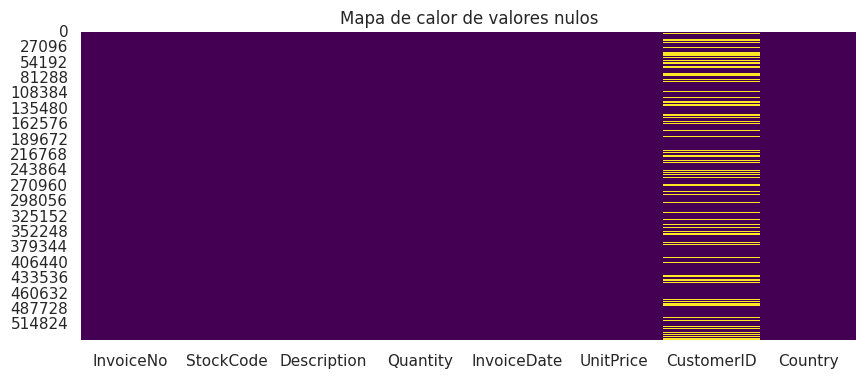

In [7]:
# Visualizar valores nulos
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

## 2. Análisis estadístico descriptivo

### 2.1 Variables numéricas

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


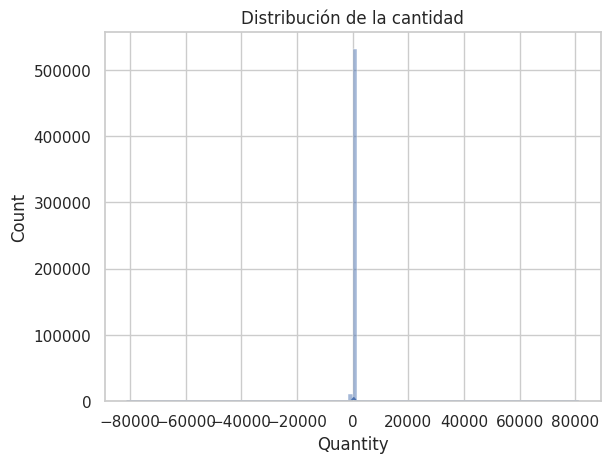

In [9]:
# Distribución de cantidad
sns.histplot(df['Quantity'], bins=100, kde=True)
plt.title('Distribución de la cantidad')
plt.show()

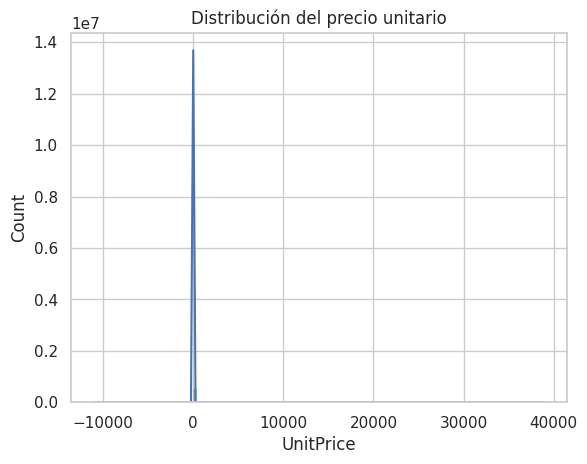

In [10]:
# Distribución del precio
sns.histplot(df['UnitPrice'], bins=100, kde=True)
plt.title('Distribución del precio unitario')
plt.show()

### 2.2 Variables categóricas

In [11]:
# Frecuencia de países
df['Country'].value_counts().head(10)

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [12]:
# Frecuencia de productos
df['Description'].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


## 3. Visualizaciones para el análisis

### 3.1 Productos más vendidos

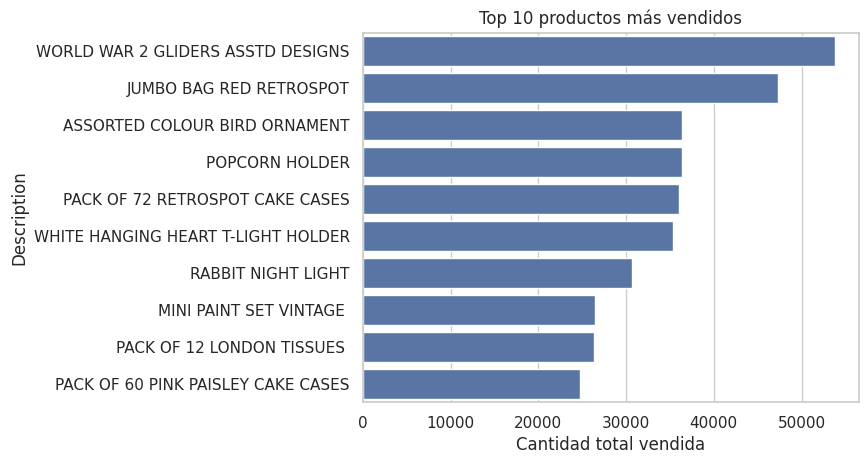

In [13]:
top_prod = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_prod.values, y=top_prod.index)
plt.title('Top 10 productos más vendidos')
plt.xlabel('Cantidad total vendida')
plt.show()

### 3.2 Productos con mayor facturación

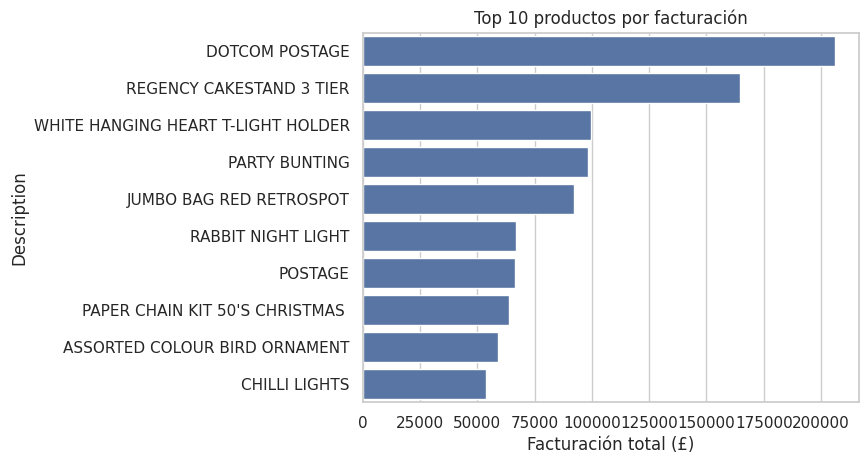

In [14]:
df['Total'] = df['Quantity'] * df['UnitPrice']
top_fact = df.groupby('Description')['Total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_fact.values, y=top_fact.index)
plt.title('Top 10 productos por facturación')
plt.xlabel('Facturación total (£)')
plt.show()

### 3.3 Ventas por país

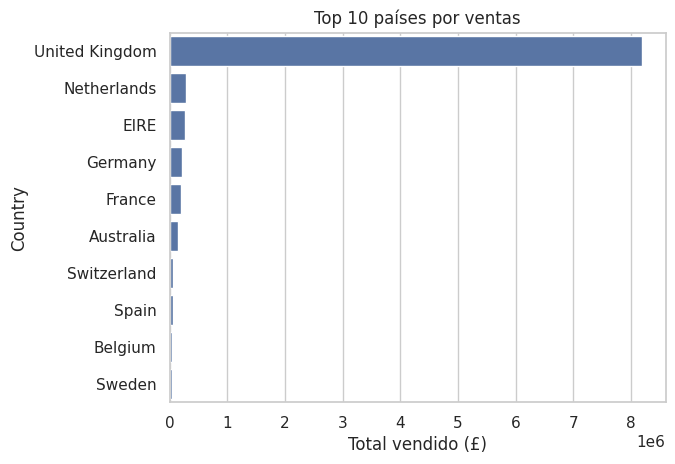

In [15]:
ventas_pais = df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ventas_pais.values, y=ventas_pais.index)
plt.title('Top 10 países por ventas')
plt.xlabel('Total vendido (£)')
plt.show()

### 3.4 Análisis temporal de ventas

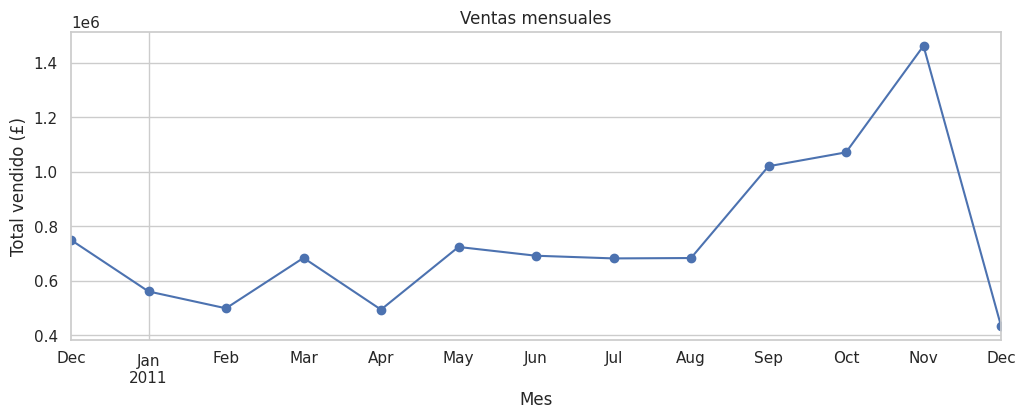

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
ventas_mes = df.groupby('Month')['Total'].sum()
ventas_mes.plot(marker='o', figsize=(12,4))
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total vendido (£)')
plt.grid(True)
plt.show()

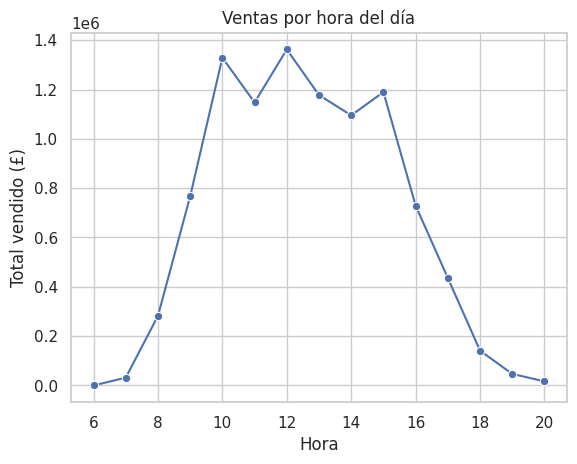

In [17]:
df['Hour'] = df['InvoiceDate'].dt.hour
ventas_hora = df.groupby('Hour')['Total'].sum()
sns.lineplot(x=ventas_hora.index, y=ventas_hora.values, marker='o')
plt.title('Ventas por hora del día')
plt.xlabel('Hora')
plt.ylabel('Total vendido (£)')
plt.grid(True)
plt.show()